<a href="https://colab.research.google.com/github/RajabovX/MachineLearning/blob/main/SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# SupportVectorMachine"Underweight" or "Overweight"
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

np.random.seed(42)
num_samples = 100

height = np.random.randint(150, 200, num_samples)
weight = np.random.randint(40, 120, num_samples)

bmi = weight / ((height / 100) ** 2)
labels = np.where(bmi < 18.5, 0, np.where(bmi >= 25, 1, 0))

X = np.column_stack((height, weight))
y = labels


In [3]:
# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# 3. SVM Model
model = SVC(kernel='linear')
model.fit(X_train, y_train)


SVC(kernel='linear')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("accident.csv")

In [13]:
df.dropna(inplace=True)

In [14]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Helmet_Used"] = le.fit_transform(df["Helmet_Used"])
df["Seatbelt_Used"] = le.fit_transform(df["Seatbelt_Used"])

In [15]:
X = df.drop(columns=["Survived"])
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [22]:
y_pred = svm_model.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.45

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.28      0.39        25
           1       0.38      0.73      0.50        15

    accuracy                           0.45        40
   macro avg       0.51      0.51      0.44        40
weighted avg       0.54      0.45      0.43        40



In [23]:
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

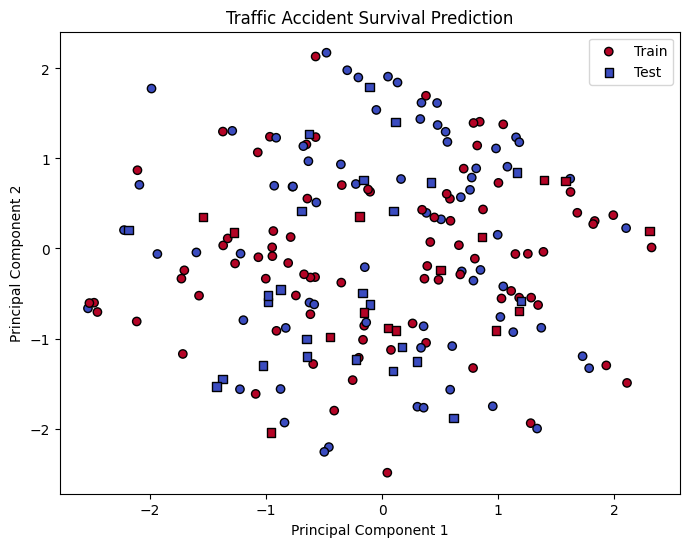

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, cmap='coolwarm', marker='o', edgecolors='k', label='Train')
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, cmap='coolwarm', marker='s', edgecolors='k', label='Test')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Traffic Accident Survival Prediction')
plt.legend()
plt.show()